# Questão 1

## Previsão do Saldo Médio do Cartão de Crédito

Neste case, você deverá aplicar a regressão linear múltipla para estimar o saldo médido do cartão de crédito de clientes de um banco, a partir das demais informações contidas no conjunto de dados (credit_regression.csv), os quais são descritos abaixo. Aplique a regressão linear, utilizando o LinearRegression do sklearn e, também, o OLS do statsmodels.

- ID - Identificação
- Income - Renda
- Limit - Limite de crédito
- Rating - Score do Serasa
- Age - Idade
- Education - Anos de educação
- Gender - Gênero
- Student - É estudante? (Sim ou Não)
- Married - É casado(a)? (Sim ou Não)
- Ethnicity - Afro-americano, asiático ou branco
- Balance - Saldo médio do cartão de crédito em dólares

[Link do dataframe](https://s3-sa-east-1.amazonaws.com/lcpi/ab0a9e91-89d1-4897-b384-51a86c50b804.csv)

# Importação da bibliotecas

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import normaltest

sns.set()

# Dataframe

In [148]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/ab0a9e91-89d1-4897-b384-51a86c50b804.csv')

In [149]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [150]:
df = df.drop('Unnamed: 0', axis=1)

df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [146]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [153]:
df.shape

(400, 11)

In [154]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


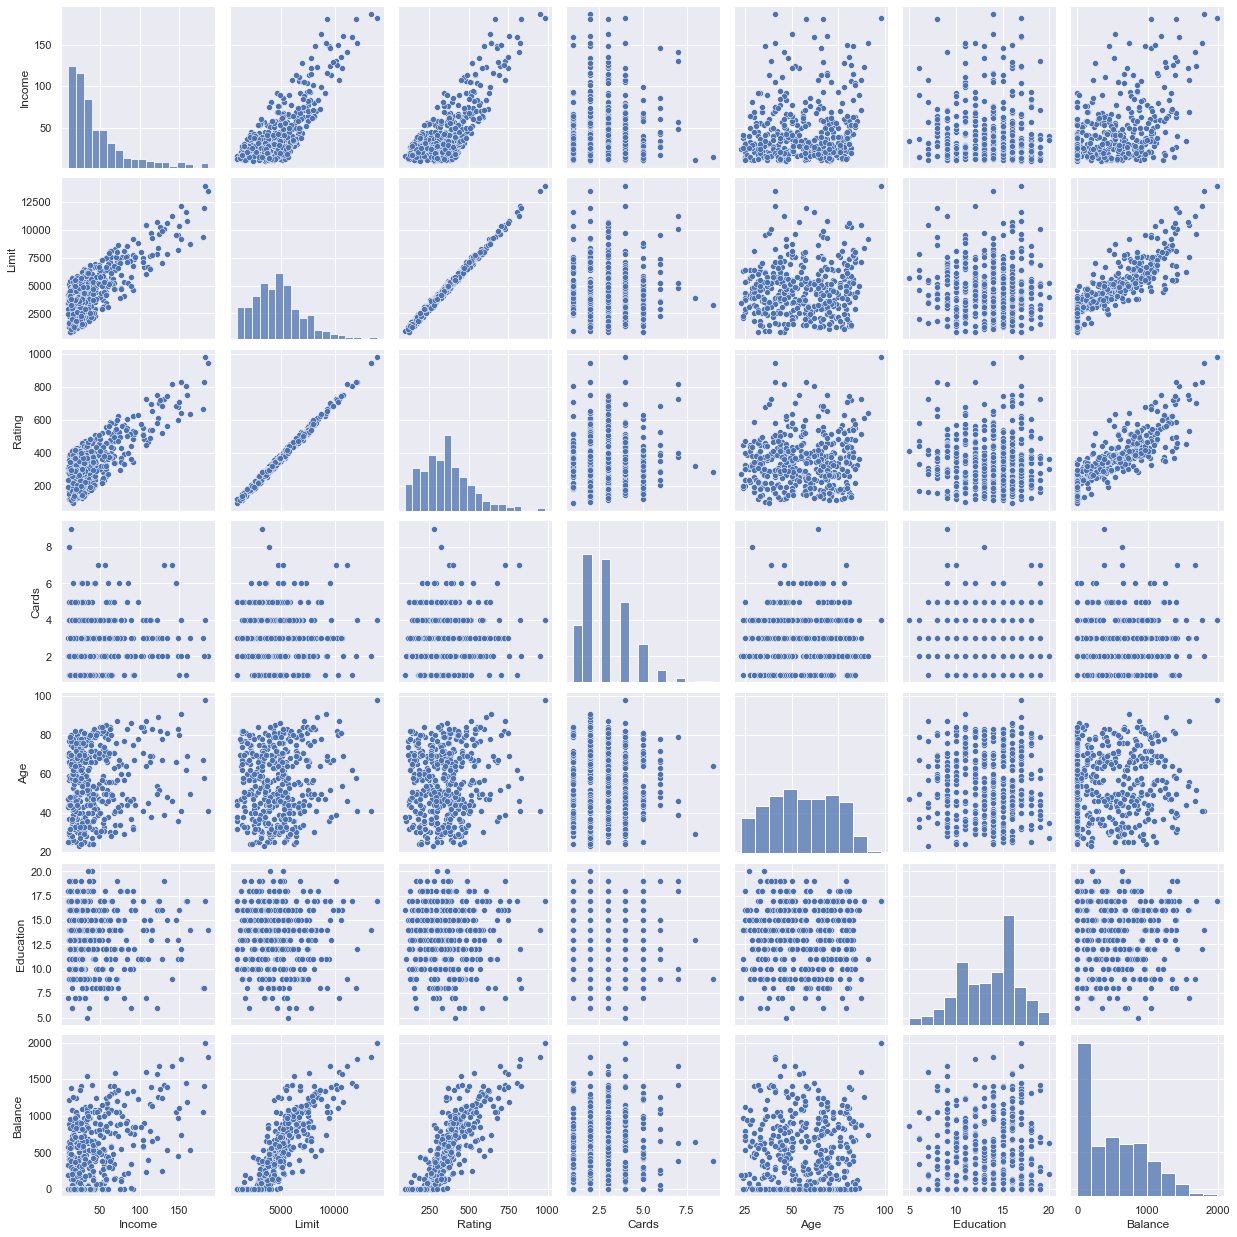

In [155]:
sns.pairplot(df)

In [151]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


# Modelo inicial apenas com as variáveis numéricas

In [156]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [157]:
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]

y = df.Balance

## LinearRegression

In [158]:
lr = LinearRegression().fit(X, y)

y_pred_initial = lr.predict(X)

lr.score(X, y)

0.878245293186235

In [159]:
residuos = y - y_pred_initial

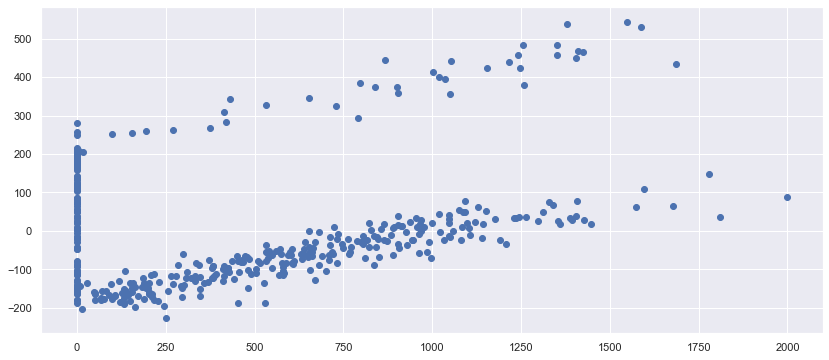

In [162]:
plt.figure(figsize=(14, 6))

plt.scatter(y, residuos)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

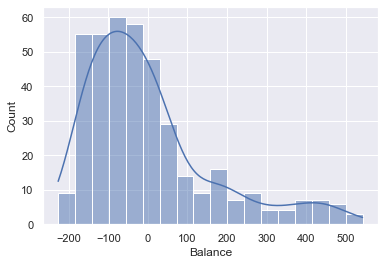

In [163]:
sns.histplot(residuos, kde=True)

## Statsmodels

In [164]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [165]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     472.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.01e-176
Time:                        23:43:01   Log-Likelihood:                -2598.2
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     393   BIC:                             5238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -477.9581     55.065     -8.680      0.000    -586.217    -369.699
Income        -7.5580      0.382    -19.766      0.000      -8.310      -6.806
Limit          0.1259      0.053      2.373      0.018       0.022       0.230
Rating         2.0631      0.794      2.598      0.010       0.502       3.625
Cards         11.5916      7.067      1.640      0.102      -2.302      25.485
Age           -0.8924      0.478     -1.867      0.063      -1.832       0.048
Education      1.9983      2.600      0.769      0.443      -3.113       7.110
==============================================================================
Omnibus:                       96.489   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.212
Skew:                           1.397   Prob(JB):                     1.09e-37
Kurtosis:                       4.553   Cond. No.                     3.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

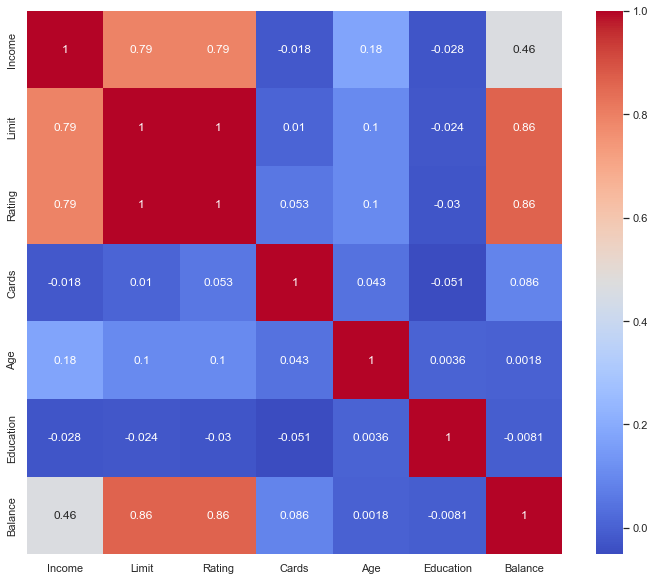

In [166]:
plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Modelo com as variáveis categóricas

In [168]:
df_dummies = pd.get_dummies(df, drop_first=True)

df_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


<AxesSubplot:>

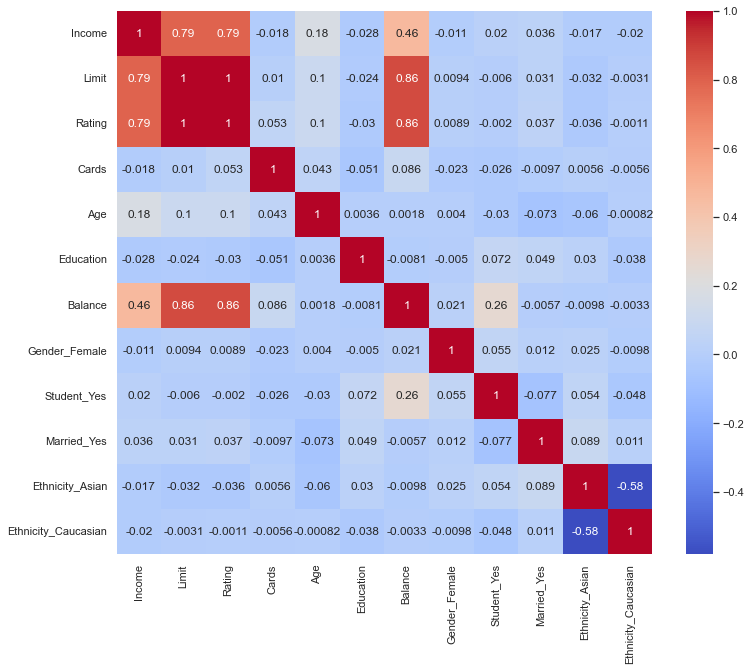

In [169]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm')

## Statsmodels

In [170]:
df_dummies.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian',
       'Ethnicity_Caucasian'],
      dtype='object')

In [171]:
X_with_categorical = df_dummies.drop('Balance', axis=1)

y_with_categorical = df_dummies.Balance

In [172]:
x = sm.add_constant(X_with_categorical)

model_with_categorical = sm.OLS(y_with_categorical, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [173]:
model_with_categorical.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.11e-253
Time:                        23:47:41   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Income                 -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                   0.1909      0.033      5.824      0.000       0.126       0.255
Rating                  1.1365      0.491      2.315      0.021       0.171       2.102
Cards                  17.7245      4.341      4.083      0.000       9.190      26.259
Age                    -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education              -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_Female         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student_Yes           425.7474     16.723     25.459      0.000     392.869     458.626
Married_Yes            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity_Asian        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity_Caucasian    10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Removendo as variáveis com baixa correlação

In [174]:
X_minimal = df_dummies[['Limit', 'Income', 'Rating', 'Student_Yes']]

y_minimal = df_dummies.Balance

## LinearRegression

In [175]:
lr = LinearRegression().fit(X_minimal, y_minimal)

y_pred_minimal = lr.predict(X_minimal)

lr.score(X_minimal, y_minimal)

0.9521875044403831

In [176]:
residuos_minimal = y_minimal - y_pred_minimal

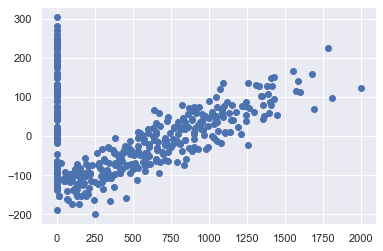

In [177]:
plt.scatter(y_minimal, residuos_minimal)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

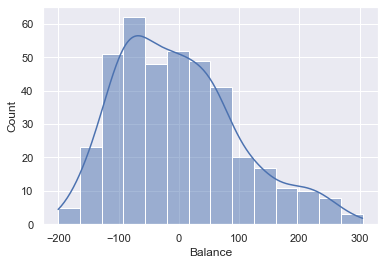

In [178]:
sns.histplot(residuos_minimal, kde=True)

## Statsmodels

In [179]:
x_minimal = sm.add_constant(X_minimal)

model_minimal = sm.OLS(y_minimal, x_minimal).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [180]:
model_minimal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1967.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.06e-259
Time:                        23:52:38   Log-Likelihood:                -2411.3
No. Observations:                 400   AIC:                             4833.
Df Residuals:                     395   BIC:                             4852.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -516.7183     20.005    -25.829      0.000    -556.049    -477.388
Limit           0.1217      0.028      4.367      0.000       0.067       0.176
Income         -7.9446      0.235    -33.742      0.000      -8.408      -7.482
Rating          2.1904      0.415      5.279      0.000       1.375       3.006
Student_Yes   422.6684     16.874     25.049      0.000     389.495     455.842
==============================================================================
Omnibus:                       24.527   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.945
Skew:                           0.647   Prob(JB):                     8.55e-07
Kurtosis:                       2.963   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

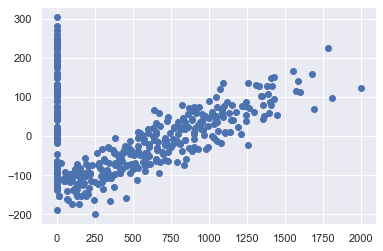

In [181]:
plt.scatter(y_minimal, model_minimal.resid)

# Remoção dos outliers

In [196]:
def calc_inf_sup_interval(column_data):
    Q1 = column_data.quantile(q=0.25)
    
    Q3 = column_data.quantile(q=0.75)

    IQR = Q3 - Q1

    inf = Q1 - 1.5 * IQR
    
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [183]:
df_dummies.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian',
       'Ethnicity_Caucasian'],
      dtype='object')

<AxesSubplot:xlabel='Balance'>

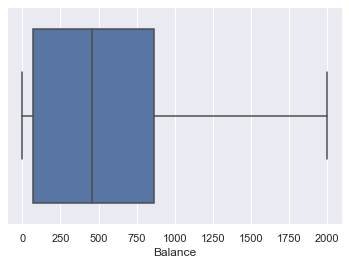

In [191]:
sns.boxplot(data=df_dummies, x='Balance')

<AxesSubplot:xlabel='Income'>

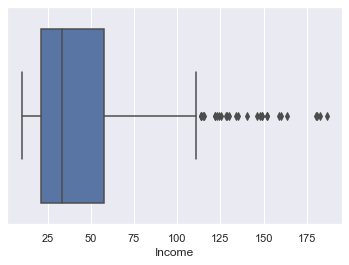

In [190]:
sns.boxplot(data=df_dummies, x='Income')

<AxesSubplot:xlabel='Limit'>

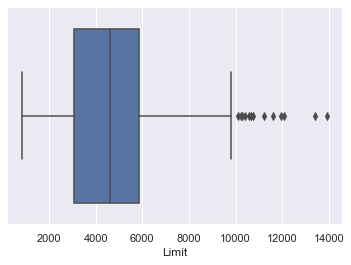

In [192]:
sns.boxplot(data=df_dummies, x='Limit')

<AxesSubplot:xlabel='Rating'>

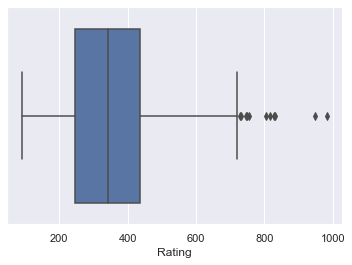

In [193]:
sns.boxplot(data=df_dummies, x='Rating')

In [194]:
X_minimal.columns[:3]

Index(['Limit', 'Income', 'Rating'], dtype='object')

In [198]:
df_without_outliers = df_dummies.copy()

columns_to_remove_outliers = X_minimal.columns[:3]

for column in columns_to_remove_outliers:
    inf, sup = calc_inf_sup_interval(df_without_outliers[column])
    
    df_without_outliers = df_without_outliers[(df_without_outliers[column] >= inf) & (df_without_outliers[column] <= sup)]

# Remove saldos com zero

In [199]:
df_final = df_without_outliers.query('Balance != 0')

df_final.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1
5,80.180,8047,569,4,77,10,1151,0,0,0,0,1
6,20.996,3388,259,2,37,12,203,1,0,0,0,0


# Modelo sem outliers e sem pessoas com saldo zerado

In [200]:
X_final = df_final[['Limit', 'Rating', 'Income', 'Student_Yes']]

y_final = df_final.Balance

## LinearRegression

In [201]:
lr = LinearRegression().fit(X_final, y_final)

y_pred_final = lr.predict(X_final)

lr.score(X_final, y_final)

0.9909387605904292

In [202]:
residuos_final = y_final - y_pred_final

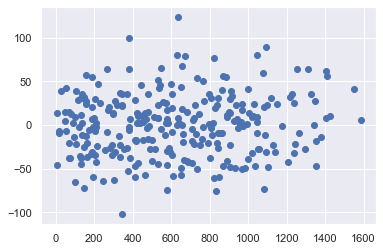

In [203]:
plt.scatter(y_final, residuos_final)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

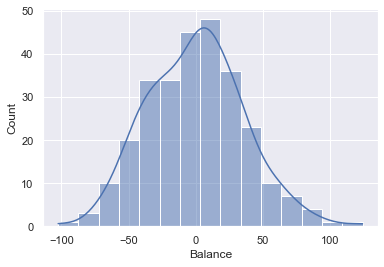

In [204]:
sns.histplot(residuos_final, kde=True)

## Statsmodels

In [205]:
x_final = sm.add_constant(X_final)

model_final = sm.OLS(y_final, x_final).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [206]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7436.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.04e-276
Time:                        00:02:22   Log-Likelihood:                -1381.2
No. Observations:                 277   AIC:                             2772.
Df Residuals:                     272   BIC:                             2790.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -727.7341     10.769    -67.578      0.000    -748.935    -706.533
Limit           0.2351      0.012     19.253      0.000       0.211       0.259
Rating          1.3714      0.179      7.640      0.000       1.018       1.725
Income        -10.1986      0.127    -79.999      0.000     -10.450      -9.948
Student_Yes   498.6675      6.783     73.513      0.000     485.313     512.022
==============================================================================
Omnibus:                        2.248   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.000
Skew:                           0.201   Prob(JB):                        0.368
Kurtosis:                       3.106   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Questão 2

##  Estimando o Preço de Venda de Casas
O arquivo usa_housing.csv consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

- Avg. Area Income: Média da renda dos residentes de onde a casa está localizada.
- Avg. Area House Age: Média de idade das casas da mesma cidade.
- Avg. Area Number of Rooms: Número médio de quartos para casas na mesma cidade.
- Avg. Area Number of Bedrooms: Número médio de quartos para casas na mesma cidade.
- Area Population: A população da cidade onde a casa está localizada.
- Price: Preço de venda da casa.
- Address: Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

[Link do dataframe](https://s3-sa-east-1.amazonaws.com/lcpi/7cf57d48-ac3d-4748-9d81-5b4d6677fcff.csv)

# Importação das bibliotecas

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import normaltest

sns.set()

# Dataframe

In [208]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/7cf57d48-ac3d-4748-9d81-5b4d6677fcff.csv')

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


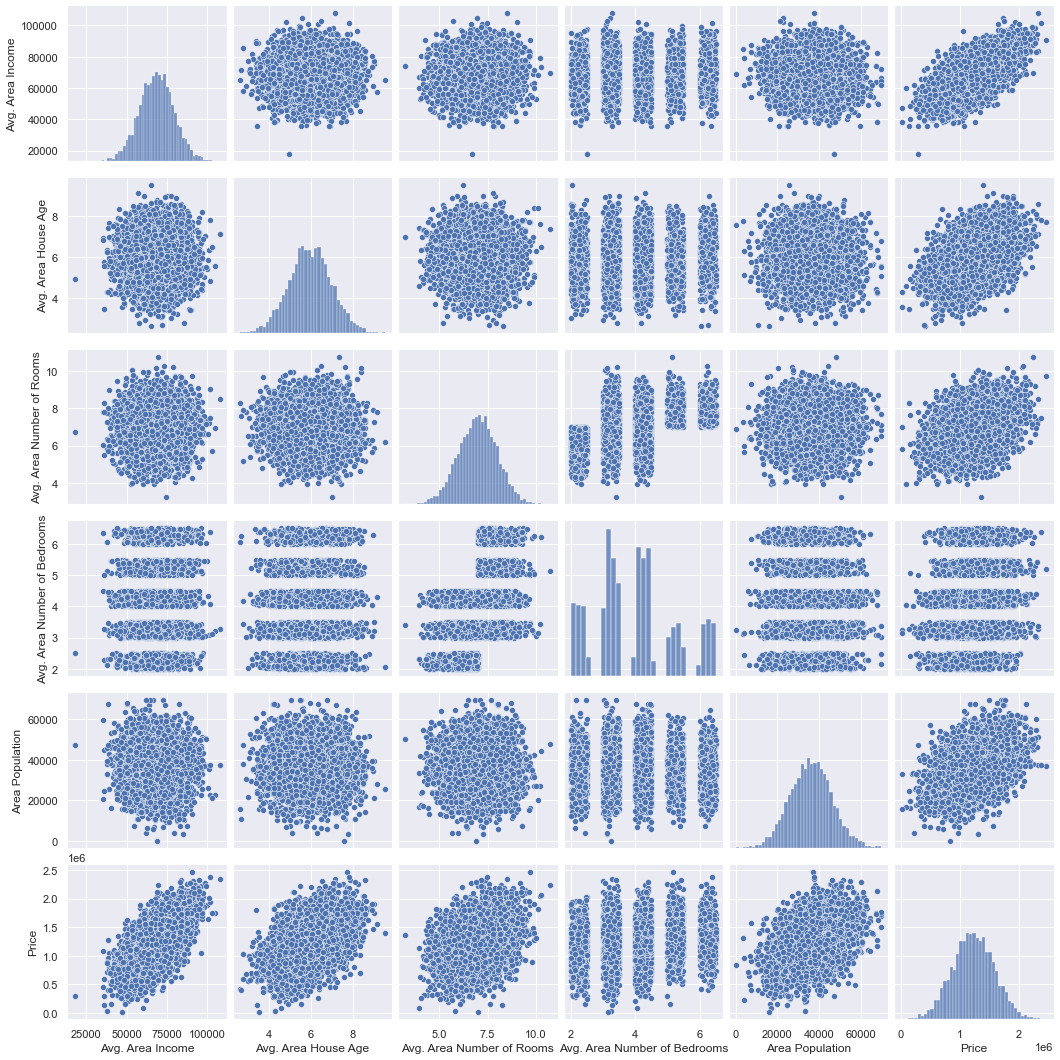

In [209]:
sns.pairplot(df)

<AxesSubplot:>

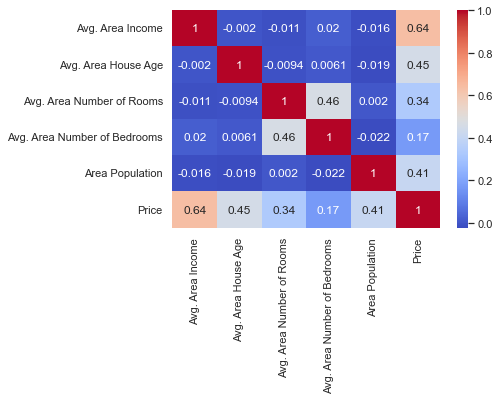

In [210]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Modelo inicial apenas com as variáveis numéricas

In [211]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [212]:
X = df.drop(['Address', 'Price'], axis = 1)

y = df['Price']

## LinearRegression

In [213]:
lr = LinearRegression().fit(X, y)

y_pred_initial = lr.predict(X)

lr.score(X, y)

0.9180238195089553

In [214]:
residuos = y - y_pred_initial

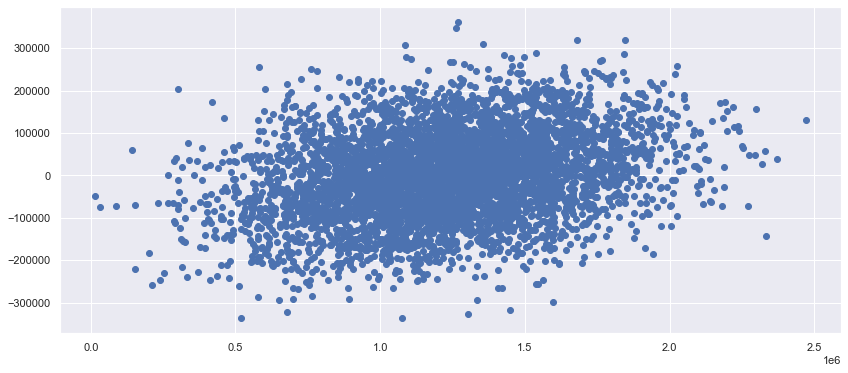

In [215]:
plt.figure(figsize=(14, 6))

plt.scatter(y, residuos)

<AxesSubplot:xlabel='Price', ylabel='Count'>

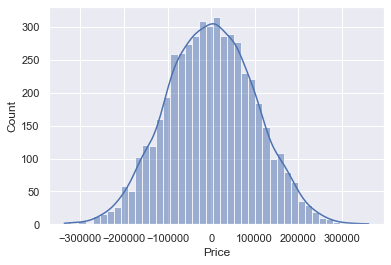

In [216]:
sns.histplot(residuos, kde=True)

## Statsmodels

In [217]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [218]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:15:46   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Avg. Area Income                21.5780      0.134    160.656      0.000      21.315      21.841
Avg. Area House Age           1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Area Population                 15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

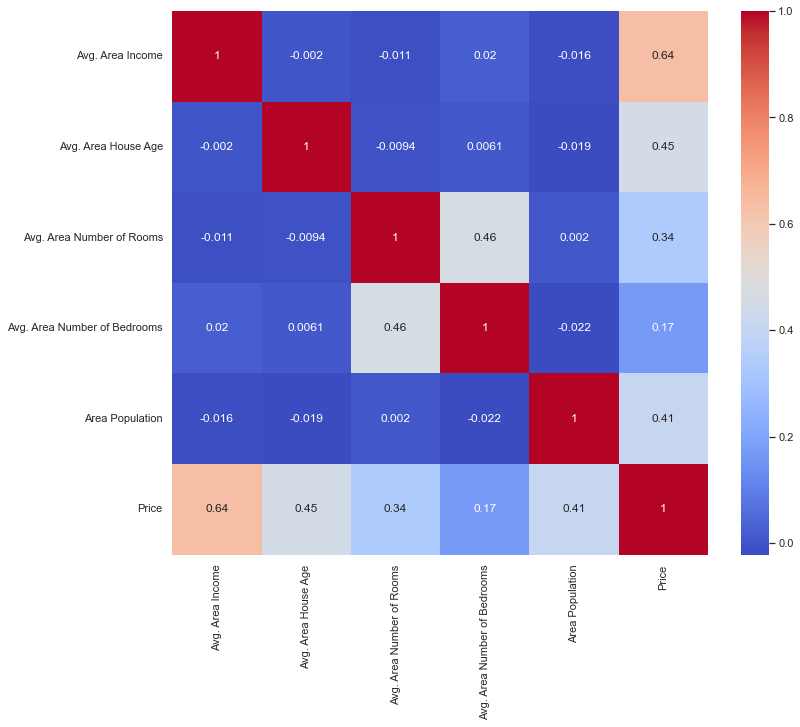

In [219]:
plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Modelo sem a variável com baixa correlação

In [220]:
X = df.drop(['Address', 'Price', 'Avg. Area Number of Bedrooms'], axis = 1)

y = df['Price']

## LinearRegression

In [221]:
lr = LinearRegression().fit(X, y)

y_pred_initial = lr.predict(X)

lr.score(X, y)

0.9179976891524395

In [222]:
residuos = y - y_pred_initial

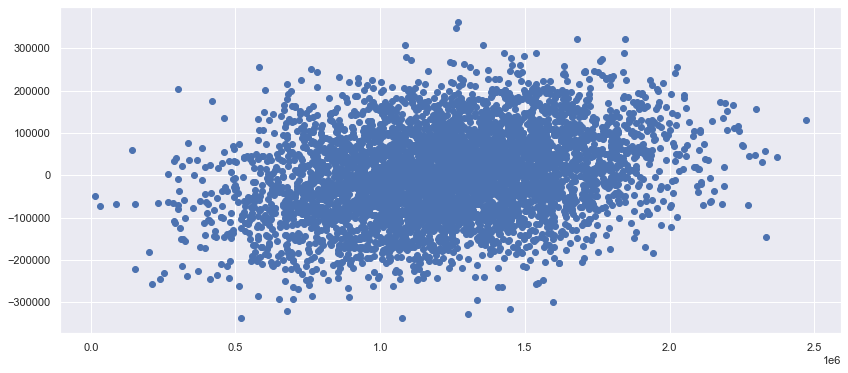

In [223]:
plt.figure(figsize=(14, 6))

plt.scatter(y, residuos)

<AxesSubplot:xlabel='Price', ylabel='Count'>

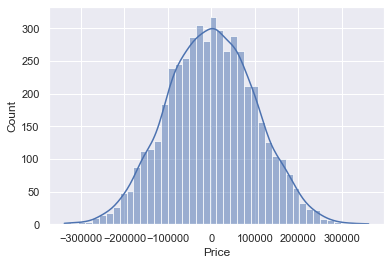

In [224]:
sns.histplot(residuos, kde=True)

## Statsmodels

In [225]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [226]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:18:11   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.638e+06   1.72e+04   -153.726      0.000   -2.67e+06    -2.6e+06
Avg. Area Income             21.5827      0.134    160.743      0.000      21.320      21.846
Avg. Area House Age        1.657e+05   1443.404    114.769      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms  1.216e+05   1422.608     85.476      0.000    1.19e+05    1.24e+05
Area Population              15.1961      0.144    105.388      0.000      14.913      15.479
==============================================================================
Omnibus:                        5.310   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.742
Skew:                           0.011   Prob(JB):                       0.0934
Kurtosis:                       2.851   Cond. No.                     9.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

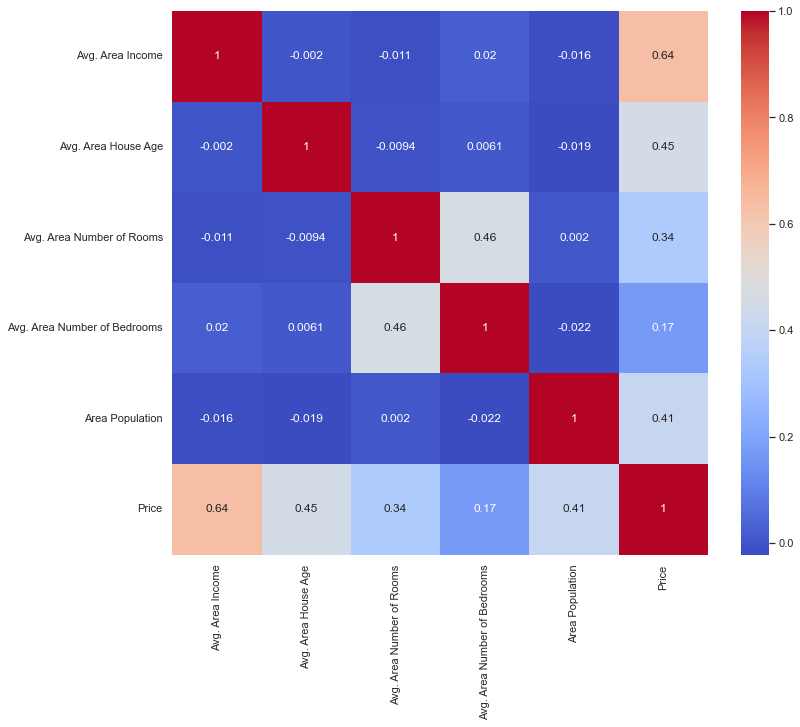

In [227]:
plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')